# https://pub.towardsai.net/end-to-end-machine-learning-project-development-spam-classifier-9fe6ca4efed2 

# Cornellius Yudha Wijaya Mar, 2024 Towards AI

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Take data in. Data ingestion

In [3]:
df = pd.read_csv('spam_assassin.csv')
df.head()

,text,target,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 428,Unnamed: 429,Unnamed: 430,Unnamed: 431,Unnamed: 432,Unnamed: 433,Unnamed: 434,Unnamed: 435,Unnamed: 436,Unnamed: 437
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data_cleaning and preprocessing

In [4]:
cols_to_keep = ['text','target']
df = df[cols_to_keep]
df.head()

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [5]:
df.tail()

,text,target
5821,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0
5822,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0
5823,Received: from hq.pro-ns.net (localhost [127.0...,1
5824,From razor-users-admin@lists.sourceforge.net T...,0
5825,From rssfeeds@jmason.org Mon Sep 30 13:44:10 2...,0


In [6]:
df.shape

(5826, 2)

In [7]:
df.dtypes

text      object
target    object
dtype: object

In [8]:
# count if there are Nan values in dataset 'text' column
sum(df['text'].isna())

0

In [10]:
# drop all rows where 'text' column has NaN values
df.dropna(subset=['text'], inplace=True)

In [11]:
# count if there are Nan values in dataset 'target' column
sum(df['target'].isna())

30

In [12]:
# As there are more than 5000 records drop these rows
# too
df.dropna(subset=['target'], inplace=True)

In [13]:
# check if NaNs are removed
print(sum(df['text'].isna()))
print(sum(df['target'].isna()))

0
0


In [14]:
# Add two more columns 
df['text_length'] = df['text'].apply(len)
df['email_words'] = df['text'].str.split().apply(len)
df.head()

,text,target,text_length,email_words
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,4098,558
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,2189,295
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,3598,386
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,1918,153
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,3060,399


In [15]:
df.dtypes

text           object
target         object
text_length     int64
email_words     int64
dtype: object

In [16]:
#checking for rows where 'target' column has values
# other than '0' or '1'
invalid_rows = df.loc[(df['target'] != '0') & (df['target'] != '1')]
print(len(invalid_rows))
invalid_rows

9


,text,target,text_length,email_words
408,lift some of its > neighbors out of poverty a...,particularly Mexico,255,44
521,Hit,AlltheWeb,3,1
866,the business of His Majesty King Remios,Iroijlaplap of the Northern Ratak atolls of t...,39,7
952,mail client cannot properly display HTML. You ...,"06-29-01</title> </head> <body bgcolor=""""#fff...",147,23
1253,EE. <br>That's a value of over $700.00! Respon...,<br>and increase your chances to win with fou...,69,12
1615,his threatens both a core value of the United ...,therefore,181,28
3441,t,it is pretty easy to manage. It is based on a...,1,1
3873,Lycos,WebCrawler,5,1
4307,ew preference 'sshversion' can be used to cont...,which will make unison use whatever version o...,155,29


In [17]:
# drop invalid_rows Or keep only valid rows
clean_df = df[(df['target'] == '0') | (df['target'] == '1')]
clean_df.shape

(5787, 4)

In [18]:
# Convert 'target' column from object to integer
clean_df['target'] = clean_df['target'].astype(int)

In [19]:
clean_df.dtypes

text           object
target          int32
text_length     int64
email_words     int64
dtype: object

# Visual Analytics

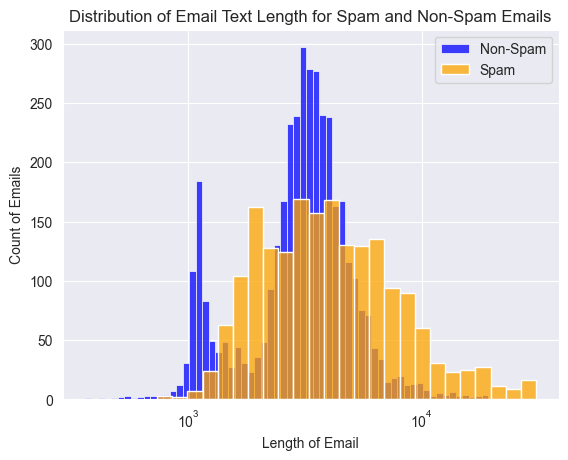

In [21]:
# Using Seaborn to see the differences between spam and non-spam for the number of words.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with numerical columns
num_df = clean_df[['text_length', 'email_words', 'target']]

# Plot histograms for text length
sns.histplot(num_df[num_df['target'] == 0]['text_length'], color='blue', label='Non-Spam', kde=False, log_scale=True)
sns.histplot(num_df[num_df['target'] == 1]['text_length'], color='orange', label='Spam', kde=False, log_scale=True)

plt.xlabel('Length of Email')
plt.ylabel('Count of Emails')
plt.title('Distribution of Email Text Length for Spam and Non-Spam Emails')
plt.legend()
plt.show()

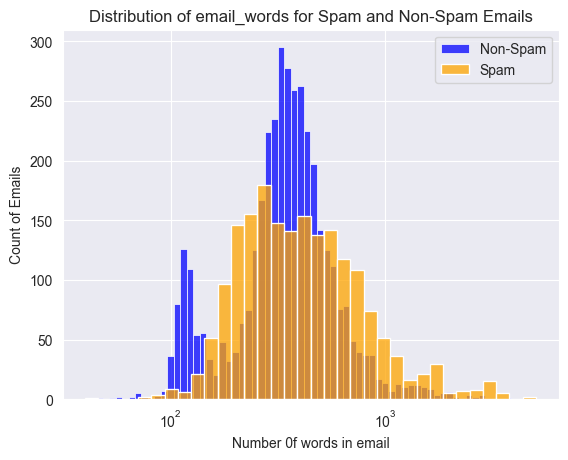

In [22]:
# Plot histograms for eamil_words
sns.histplot(num_df[num_df['target'] == 0]['email_words'], color='blue', label='Non-Spam', kde=False, log_scale=True)
sns.histplot(num_df[num_df['target'] == 1]['email_words'], color='orange', label='Spam', kde=False, log_scale=True)

plt.xlabel('Number 0f words in email')
plt.ylabel('Count of Emails')
plt.title('Distribution of email_words for Spam and Non-Spam Emails')
plt.legend()
plt.show()

# Some more data preprocessing

In [23]:
# Find count of records with target == 0 and 
# target == 1
target_counts = clean_df['target'].value_counts()

# Print the counts
print("Count of records with target == 0:", target_counts[0])
print("Count of records with target == 1:", target_counts[1])

Count of records with target == 0: 3896
Count of records with target == 1: 1891


In [24]:
# Using under sampling to create a balanced dataset
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your pandas DataFrame
# Separate features and target variable
X = clean_df[['text','text_length', 'email_words']]
y = clean_df['target']

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution in the balanced DataFrame
print(balanced_df['target'].value_counts())

target
0    1891
1    1891
Name: count, dtype: int64


In [25]:

print(balanced_df.shape)

(3782, 4)


# Finally, visualize the complete preprocessed data

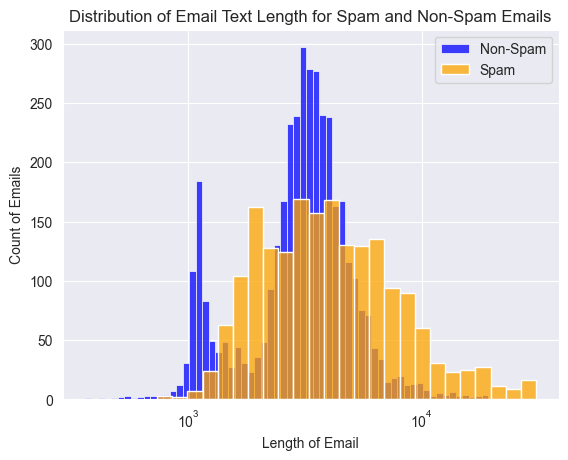

In [26]:
# Plot histograms for text length for balanced data
sns.histplot(num_df[num_df['target'] == 0]['text_length'], color='blue', label='Non-Spam', kde=False, log_scale=True)
sns.histplot(num_df[num_df['target'] == 1]['text_length'], color='orange', label='Spam', kde=False, log_scale=True)

plt.xlabel('Length of Email')
plt.ylabel('Count of Emails')
plt.title('Distribution of Email Text Length for Spam and Non-Spam Emails')
plt.legend()
plt.show()

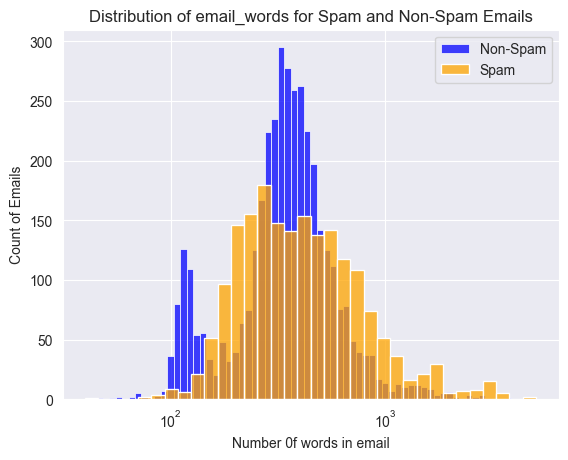

In [27]:
# Plot histograms for eamil_words for balanced data
sns.histplot(num_df[num_df['target'] == 0]['email_words'], color='blue', label='Non-Spam', kde=False, log_scale=True)
sns.histplot(num_df[num_df['target'] == 1]['email_words'], color='orange', label='Spam', kde=False, log_scale=True)

plt.xlabel('Number 0f words in email')
plt.ylabel('Count of Emails')
plt.title('Distribution of email_words for Spam and Non-Spam Emails')
plt.legend()
plt.show()

# Above plots show that spam emails have a considerably longer  word-count and length  than non-spam emails.

    # NOW SWITCH TO COMMAND LINE/ TERMINAL
# EXECUTE pip install mlflow (REQUIRED ONCE ONLY)
# execute mlflow ui (REQUIRED EVERY TIME YOU RUN THIS EXPERIMENT)

PS D:\EMAIL_SPAM_HAM_CLASSIFICATION\SPAM_ASSASSIN_PROJECT> mlflow ui
INFO:waitress:Serving on http://127.0.0.1:5000 

![Here_is_mlflow_ui_running_in_browser](MLFLOW_UI.png)

# Model Development and Experiment Tracking with MLFlow

In [28]:
# create train-test data-set
#Splitting the dataset into training and test. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(balanced_df.drop('target', axis =1), balanced_df['target'], test_size = 0.2, stratify = balanced_df['target'], random_state = 42)

In [29]:
X_train.head()

,text,text_length,email_words
5813,From bmortgage@ig.com.br Sun Sep 22 23:59:12 2...,5725,564
4395,From floyd@streamlineb2b.net Mon Jun 24 17:45:...,3099,431
5207,From bmt988b@netscape.net Mon Jun 24 17:06:38 ...,12074,1087
3981,From moviedbjwuede@mandic.com.br Mon Dec 2 11:...,1530,198
2211,Received: from hq.pro-ns.net (localhost [127.0...,3849,363


In [30]:
X_train.shape

(3025, 3)

In [31]:
# Concatenate X_train and y_train along axis=1 to form training_data we will require it for model drift analysis
training_data = pd.concat([X_train, y_train], axis=1)
print(training_data.shape)

# Save training_data as training_data.csv
training_data.to_csv('training_data.csv', index=False)

(3025, 4)


In [40]:
import mlflow

EXPERIMENT_NAME = "SPAMASSASSIN_EMAIL_SPAM_HAM_CLASSIFIER4"
EXPERIMENT_ID = mlflow.create_experiment(EXPERIMENT_NAME)

# Refresh the page so that you can view the newly created experiment

# If you need to access this experiment once more, we could do that with code below:

In [41]:
current_experiment=dict(mlflow.get_experiment_by_name(EXPERIMENT_NAME))
experiment_id=current_experiment['experiment_id']
print(current_experiment)
print(experiment_id)

{'artifact_location': 'mlflow-artifacts:/772710210198280983', 'creation_time': 1726217358931, 'experiment_id': '772710210198280983', 'last_update_time': 1726217358931, 'lifecycle_stage': 'active', 'name': 'SPAMASSASSIN_EMAIL_SPAM_HAM_CLASSIFIER4', 'tags': {}}
772710210198280983


# Define experiment tracking function. We will not call that function as yet

In [42]:
import mlflow.data
from mlflow.data.pandas_dataset import PandasDataset
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Set the MLflow tracking URI
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

def evaluate_models(train_data, train_labels, experiment_id):
    print(experiment_id)
    
    training_df = pd.concat([X_train['text'], y_train], axis =1).reset_index(drop = True)
    # Models to evaluate
    models = {
        "Naive Bayes": MultinomialNB(),
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    # Metrics
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score),
               'recall': make_scorer(recall_score),
               'f1': make_scorer(f1_score)}

    # Vectorizations
    vectorizers = {
        "BoW": CountVectorizer(),
        "TF-IDF": TfidfVectorizer()
    }
    
    results = []
    for vect_name, vectorizer in vectorizers.items():
            X = vectorizer.fit_transform(train_data)

            for model_name, model in models.items():
                vect_mod_name = vect_name +'_'+model_name
                # Cross-Validate the model
                RUN_NAME = f"run_{vect_mod_name}"
                mlflow.end_run()
                with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME) as run:
                    # Retrieve run id
                    RUN_ID = run.info.run_id

                    cv_results = cross_validate(model, X, train_labels, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=3, return_train_score=False)
                    for i in range(3):
                        iteration_result = {
                            'Iteration': i + 1,
                            'Model': model_name,
                            'Vectorizer': vect_name,
                            'Accuracy': cv_results['test_accuracy'][i],
                            'Precision': cv_results['test_precision'][i],
                            'Recall': cv_results['test_recall'][i],
                            'F1 Score': cv_results['test_f1'][i]
                        }
                        results.append(iteration_result)                       
                    # Calculating the metrics means
                    mean_result = {
                        'Iteration': 'Mean',
                        'Model': model_name,
                        'Vectorizer': vect_name,
                        'Accuracy': np.mean(cv_results['test_accuracy']),
                        'Precision': np.mean(cv_results['test_precision']),
                        'Recall': np.mean(cv_results['test_recall']),
                        'F1 Score': np.mean(cv_results['test_f1'])
                    }
                    results.append(mean_result)
                    
                    
                    # Track metrics
                    mlflow.log_metric(f"cv_3_{vect_mod_name}_accuracy", mean_result['Accuracy'])
                    mlflow.log_metric(f"cv_3_{vect_mod_name}_precision", mean_result['Precision'])
                    mlflow.log_metric(f"cv_3_{vect_mod_name}_recall", mean_result['Recall'])
                    mlflow.log_metric(f"cv_3_{vect_mod_name}_f1", mean_result['F1 Score'])
                    # Track model
                    model.fit(X, train_labels)
                    training_df["ModelOutput"] = model.predict(X)
                    dataset = mlflow.data.from_pandas(training_df, targets="target", predictions="ModelOutput", name = f"data_{vect_mod_name}")
                    mlflow.log_input(dataset, context="training")
                    
                    if model_name == "XGBoost":
                        mlflow.xgboost.log_model(model, "model")
                    else:
                        mlflow.sklearn.log_model(model, "model")
                                
                    mlflow.end_run() 
        
 
    return pd.DataFrame(results)

In [43]:
X_train['text']

5813    From bmortgage@ig.com.br Sun Sep 22 23:59:12 2...
4395    From floyd@streamlineb2b.net Mon Jun 24 17:45:...
5207    From bmt988b@netscape.net Mon Jun 24 17:06:38 ...
3981    From moviedbjwuede@mandic.com.br Mon Dec 2 11:...
2211    Received: from hq.pro-ns.net (localhost [127.0...
                              ...                        
3637    From justin.armstrong@acm.org Mon Sep 2 12:29:...
3421    From ilug-admin@linux.ie Thu Aug 8 14:11:51 20...
5280    From cvru@hotmail.com Mon Jun 24 17:06:48 2002...
2788    From spamassassin@localhost Mon Jun 24 17:04:1...
1957    From fork-admin@xent.com Tue Aug 6 12:01:13 20...
Name: text, Length: 3025, dtype: object

In [44]:
y_train

5813    1
4395    1
5207    1
3981    1
2211    1
       ..
3637    0
3421    0
5280    1
2788    1
1957    1
Name: target, Length: 3025, dtype: int32

# Below we call the experiment-tracking function Keep On refreshing mlflow page to see model training live.

In [45]:
email_res = evaluate_models(X_train['text'], y_train, experiment_id)

772710210198280983


# Define a function for Visualizing model results

In [46]:
def viz_result_metric(data):
    plt.figure(figsize=(15, 8))

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        sns.lineplot(data=data, x='Iteration', y=metric, hue='Model', style='Vectorizer', markers=True)
        plt.title(f'Model Performance: {metric}')
        plt.xlabel('Iteration')
        plt.ylabel(metric)
        plt.legend(title='Models / Vectorizer', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Visualize the data iteration but exclude the metrics Mean

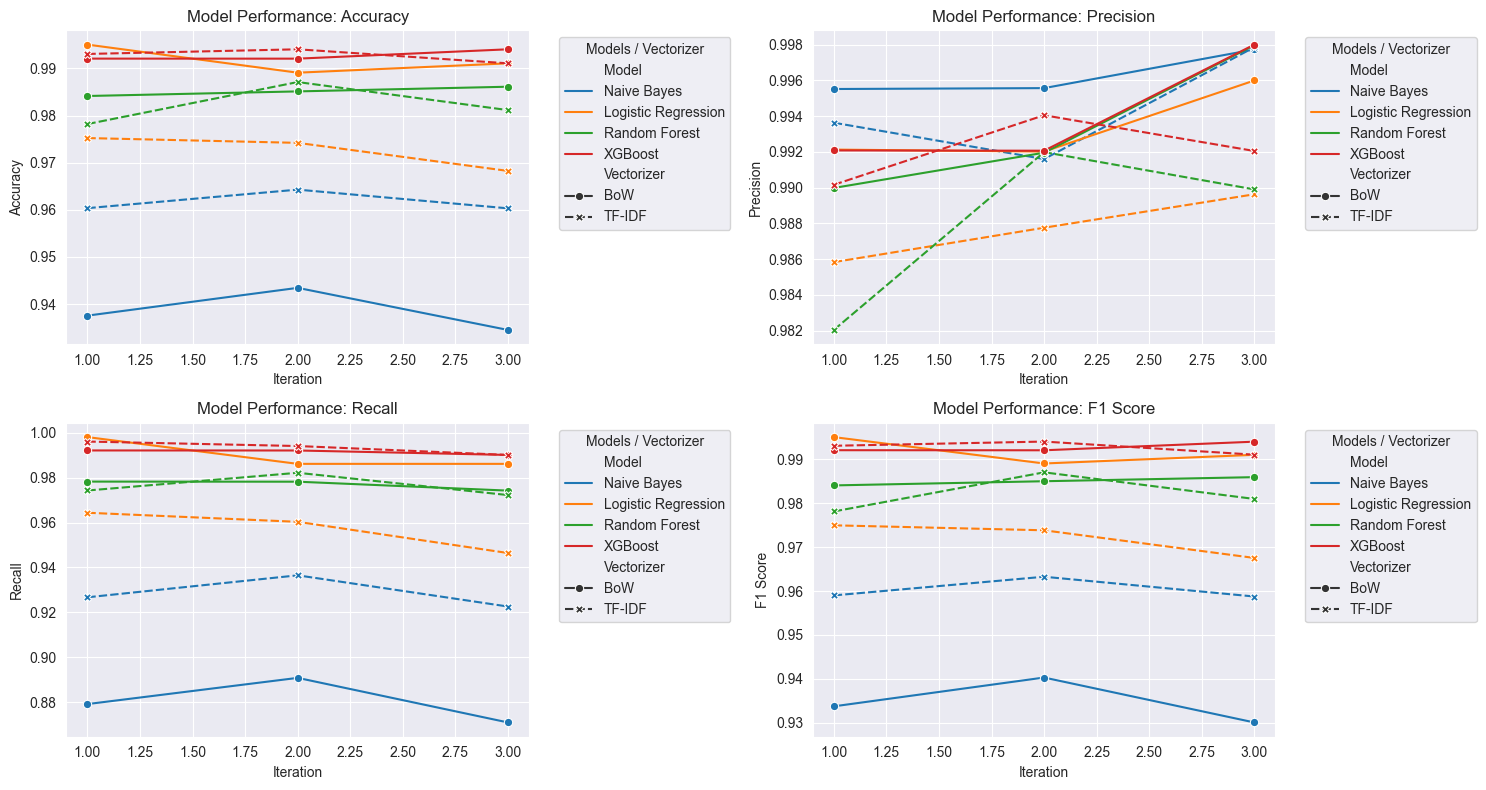

In [47]:
viz_result_metric( email_res[email_res['Iteration'] != 'Mean'])

# create data-pipeline

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier

vectorizer = CountVectorizer()
xgboost_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  

# Creating a pipeline for the whole process
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', xgboost_classifier)
])

pipeline.fit(X_train['text'], y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# create the model object with Pickle.

In [49]:
import pickle

with open('spam_classifier_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Always better to immediately load the pickle mode to check (1) that corrupted model is not saved (2) That model predicts properly on some test case

In [50]:
import pickle
filename = 'spam_classifier_pipeline.pkl'

with open(filename, 'rb') as file:
    model = pickle.load(file)

# Test a ham test case. See that it looks like a spam but model correctly predicts it as Ham. Since it is spam-assassin log file it looks 'weird' to us. But the model is not fooled¶

In [51]:
import pandas as pd
# Taking a known email from spam_assassin data-set which was marked as ham ('0')
prediction1 = model.predict(pd.Series("From ilug-admin@linux.ie Mon Jul 29 11:28:02 2002 Return-Path: <ilug-admin@linux.ie> Delivered-To: yyyy@localhost.netnoteinc.com Received: from localhost (localhost [127.0.0.1]) by phobos.labs.netnoteinc.com (Postfix) with ESMTP id A13D94414F for <jm@localhost>; Mon, 29 Jul 2002 06:25:11 -0400 (EDT) Received: from phobos [127.0.0.1] by localhost with IMAP (fetchmail-5.9.0) for jm@localhost (single-drop); Mon, 29 Jul 2002 11:25:11 +0100 (IST) Received: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g6RHn7i17130 for <jm-ilug@jmason.org>; Sat, 27 Jul 2002 18:49:07 +0100 Received: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id SAA25016; Sat, 27 Jul 2002 18:45:03 +0100 X-Authentication-Warning: lugh.tuatha.org: Host root@localhost [127.0.0.1] claimed to be lugh Received: from mail1.mail.iol.ie (mail1.mail.iol.ie [194.125.2.192]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id SAA24977 for <ilug@linux.ie>; Sat, 27 Jul 2002 18:44:56 +0100 Received: from dialup125-a.ts551.cwt.esat.net ([193.203.140.125] helo=Hobbiton.cod.ie) by mail1.mail.iol.ie with esmtp (Exim 3.35 #1) id 17YVVF-0001W4-00 for ilug@linux.ie; Sat, 27 Jul 2002 18:37:18 +0100 Received: (from cdaly@localhost) by Hobbiton.cod.ie (8.11.6/8.9.3) id g6RDRoO04681 for ilug@linux.ie; Sat, 27 Jul 2002 14:27:50 +0100 Date: Sat, 27 Jul 2002 14:27:49 +0100 From: Conor Daly <conor.daly@oceanfree.net> To: ILUG main list <ilug@linux.ie> Subject: Re: [ILUG] Architecture crossover trouble w RH7.2 (solved) Message-Id: <20020727142749.B4438@Hobbiton.cod.ie> Mail-Followup-To: ILUG main list <ilug@linux.ie> References: <0D443C91DCE9CD40B1C795BA222A729E018854FA@milexc01.maxtor.com> MIME-Version: 1.0 Content-Type: text/plain; charset=us-ascii Content-Disposition: inline User-Agent: Mutt/1.2.5i In-Reply-To: <0D443C91DCE9CD40B1C795BA222A729E018854FA@milexc01.maxtor.com>; from conor_wynne@maxtor.com on Fri, Jul 26, 2002 at 03:56:22PM +0100 Sender: ilug-admin@linux.ie Errors-To: ilug-admin@linux.ie X-Mailman-Version: 1.1 Precedence: bulk List-Id: Irish Linux Users' Group <ilug.linux.ie> X-Beenthere: ilug@linux.ie On Fri, Jul 26, 2002 at 03:56:22PM +0100 or so it is rumoured hereabouts, Wynne, Conor thought: > Surely it would be faster to save you conf files, install it on the box > again, copy back you confs and voila. > All you car about are the confs as the boite has no DATA right? Yeah, but then I'd have to remember _exactly_ which confs I'd modified and they're not all in /etc either... > Thats what I would do, but you sysadmins have to make life as difficult & > complicated as possible ;--) Yup... In this case, I had two issues. 1. I mirrored the disk to give to someone else to work on but the box he has available has only a P1 or P2 processor. 2. My celeron box has been crashing the backup software so I wanted to try out the backup in a different box to make sure it's hardware related. Again, it's also an interesting exercise... > Have you thought about mirroring the system drives? Might save you serious > hassle down the line. Oh, I'm doing that too. This is going to Africa so I'm aiming for as robust as possible with belt, braces and probably an all-in-one jumpsuit! I'll be mirroring the disk but that is worth only so much (eg. lightning strike taking out the disk(s) or system compromise) I'm also going for a backup to CDR with an automated restore http://www.mondorescue.org . The admin out there wouldn't be able to build the system again if the mobo got fried and the replacement was the wrong arch but an i386 compatible install will mean just dropping in the HD and booting (ish)... Conor -- Conor Daly <conor.daly@oceanfree.net> Domestic Sysadmin :-) --------------------- Faenor.cod.ie 2:32pm up 64 days, 23:49, 0 users, load average: 0.00, 0.00, 0.00 Hobbiton.cod.ie 2:19pm up 7 days, 20:56, 1 user, load average: 0.05, 0.02, 0.00 -- Irish Linux Users' Group: ilug@linux.ie http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information. List maintainer: listmaster@linux.ie"))[0]
print(prediction1)

0


# Here is an email that I fabricated on the fly (un-known data) with all characteristics of a spam. Let's see if it is correctly detected as such.¶

In [52]:
prediction2 = model.predict(pd.Series('Hey! you have won a lottery! For claiming your prize send us your bank account number on http://superlottojackpot.com. Further on the basis of this victory we can give you cash loan of $200000000 at rate of just 0.5% per annum without any collateral and gurantee. Send us your bank account details. If you do not have bank account we can offer you one account with 5 credit cards which are life time free and which have annual interest rate of only 1%. Each has spending limit of $50000'))[0]
print(prediction2)

1


# open airflow-webserver-1 at local host 8080:8080 and login with username 'airflow' and password 'airflow'. A DAG named spam_classifier_monthly_model_retraining  will be seen. Here we will discuss code underlying it.

# now click Trigger DAG under Actions tab. Click the link spam_classifier_monthly_model_retraining. click the Graph tab